In [2]:
# %matplotlib notebook
import tensorflow as tf
from sklearn import datasets
import numpy as np
from matplotlib import pyplot as plt

# ① 自制数据集的导入

In [ ]:
from PIL import Image

def generate(img_folder, txt_path):
    
    f = open(txt_path, 'r') 
    contents = f.readlines() # 逐行读取所有行
    f.close()
    x, y  = [], []
    print('加载中...')
    for content in contents:
        content.strip()
        value = content.split()
        img_path = img_folder + value[0]
        img = Image.open(img_path) # 打开图片
        img = np.array(img.convert('L')) # 转化图片为灰度值矩阵
        img = img/255 # 归一化
        x.append(img)
        y.append(value[1])
    x = np.array(x) # 列表先转矩阵
    y = np.array(y)
    y = y.astype(np.int64)
    print('加载完成！')
    return x, y

In [ ]:
# *******************     用"Sequential六步法"实现手写数字识别     *******************
# =============================        1.import          =============================
import os
# =============================     2.测试集、训练集     =============================

# 1.写好4个np的存储路径
x_train_savepath = '../class4/MNIST_FC/mnist_image_label/mnist_x_train.npy'
y_train_savepath = '../class4/MNIST_FC/mnist_image_label/mnist_y_train.npy'
x_test_savepath = '../class4/MNIST_FC/mnist_image_label/mnist_x_test.npy'
y_test_savepath = '../class4/MNIST_FC/mnist_image_label/mnist_y_test.npy'

# 2.如果已存在np文件直接读取
if os.path.exists(x_train_savepath) and os.path.exists(y_train_savepath) and os.path.exists(
        x_test_savepath) and os.path.exists(y_test_savepath):
    print('-------------加载已存在数据库-----------------')
    x_train = np.load(x_train_savepath)
    y_train = np.load(y_train_savepath)
    x_test = np.load(x_test_savepath)
    y_test = np.load(y_test_savepath)
    
    x_train = np.reshape(x_train, (len(x_train), 28, 28)) # 拉成28*28
    x_test = np.reshape(x_test, (len(x_test), 28, 28)) # 拉成28*28

else:
    print('-------------生成数据库中-----------------')
    x_train, y_train = generate(
        '../class4/MNIST_FC/mnist_image_label/mnist_train_jpg_60000/',
        '../class4/MNIST_FC/mnist_image_label/mnist_train_jpg_60000.txt')
    x_test, y_test = generate(
        '../class4/MNIST_FC/mnist_image_label/mnist_test_jpg_10000/',
        '../class4/MNIST_FC/mnist_image_label/mnist_test_jpg_10000.txt')
    print('-------------保存数据库中-----------------')
#     x_train = np.reshape(x_train, (len(x_train), -1)) # 拉成直条矩阵
#     x_test = np.reshape(x_test, (len(x_test), -1)) # 拉成直条矩阵
    
#     np.save(x_train_savepath, x_train)
#     np.save(y_train_savepath, y_train)
#     np.save(x_test_savepath, x_test)
#     np.save(y_test_savepath, y_test)

# =============================  3.Sequential 描述各层网络  ==========================
model = tf.keras.models.Sequential(
    [   
        tf.keras.layers.Flatten(),                     # ①.拉直层  28 * 28 → 784
        tf.keras.layers.Dense(128, activation='relu'), # ②.全链接层
        tf.keras.layers.Dense(10,activation='softmax') # ③.全链接层"0-9共10个神经元"
    ]
)
# =============================    4.Compile 配置训练方法   ==========================
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['sparse_categorical_accuracy'] # 标签是0-9数值，输出是[0.706,0.294,0.023]分布
)
# =============================      5.fit 执行训练过程     ==========================
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=5,
    validation_data=(x_test, y_test),
    # validation_split=0.2,
    validation_freq=1
)
# ==========================  6.summary 打印网络结构和参数统计  ======================
model.summary()

# ② 数据增强，扩充数据集
就是对训练特征集（图片）添加各种随机性的处理
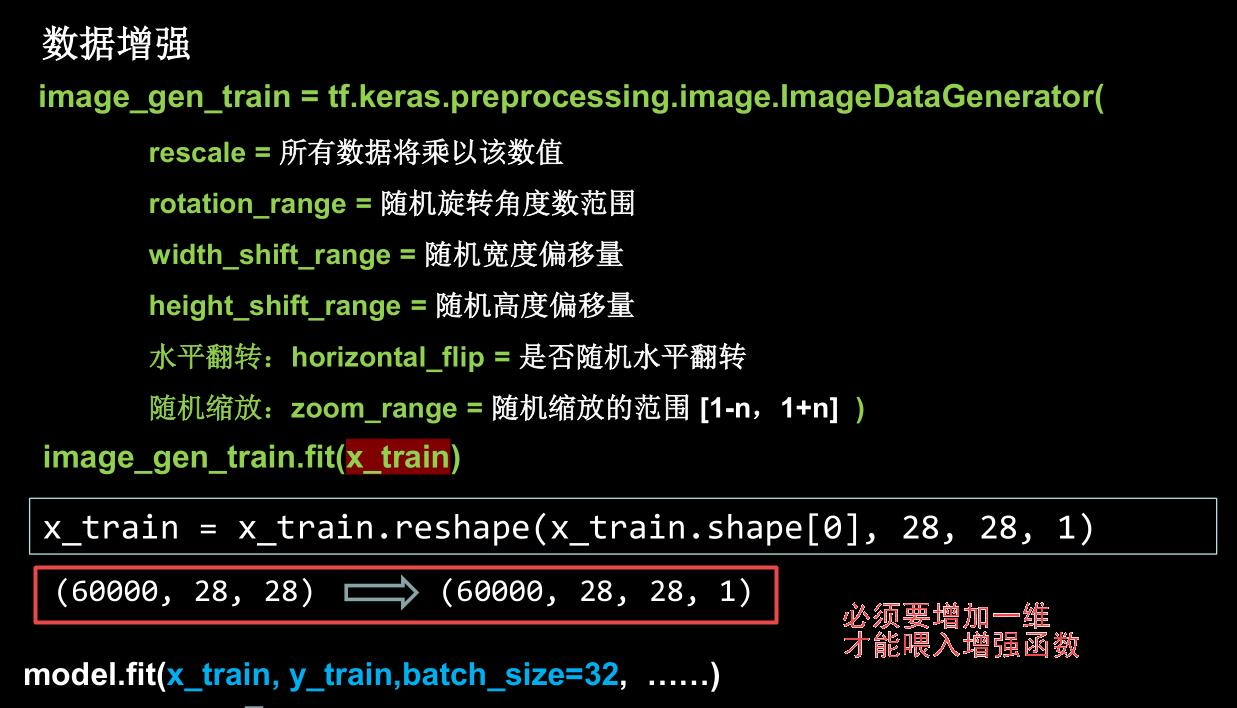
# $\color{red} {model.fit()也需要做一点点改变} $

In [ ]:
# *******************     用"Sequential六步法"实现手写数字识别     *******************
# =============================        1.import          =============================
# =============================     2.测试集、训练集     =============================
(x_train, y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

# ！！数据增强！！
enhancement = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1. / 1.,  # 如为图像，分母为255时，可归至0～1
    rotation_range=45,  # 随机45度旋转
    width_shift_range=.15,  # 宽度偏移
    height_shift_range=.15,  # 高度偏移
    horizontal_flip=False,  # 水平翻转
    zoom_range=0.5  # 将图像随机缩放阈量50％
)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
enhancement.fit(x_train)
# ！！数据增强！！

# =============================  3.Sequential 描述各层网络  ==========================
model = tf.keras.models.Sequential(
    [   
        tf.keras.layers.Flatten(),                     # ①.拉直层  28 * 28 → 784
        tf.keras.layers.Dense(128, activation='relu'), # ②.全链接层
        tf.keras.layers.Dense(10,activation='softmax') # ③.全链接层"0-9共10个神经元"
    ]
)
# =============================    4.Compile 配置训练方法   ==========================
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['sparse_categorical_accuracy'] # 标签是0-9数值，输出是[0.706,0.294,0.023]分布
)
# =============================      5.fit 执行训练过程     ==========================
model.fit(enhancement.flow(x_train, y_train, batch_size = 32), # ！！数据增强！！
    epochs=5,
    validation_data=(x_test, y_test),
    # validation_split=0.2,
    validation_freq=1
)
# ==========================  6.summary 打印网络结构和参数统计  ======================
model.summary()

# ③ 断点续训，存取模型
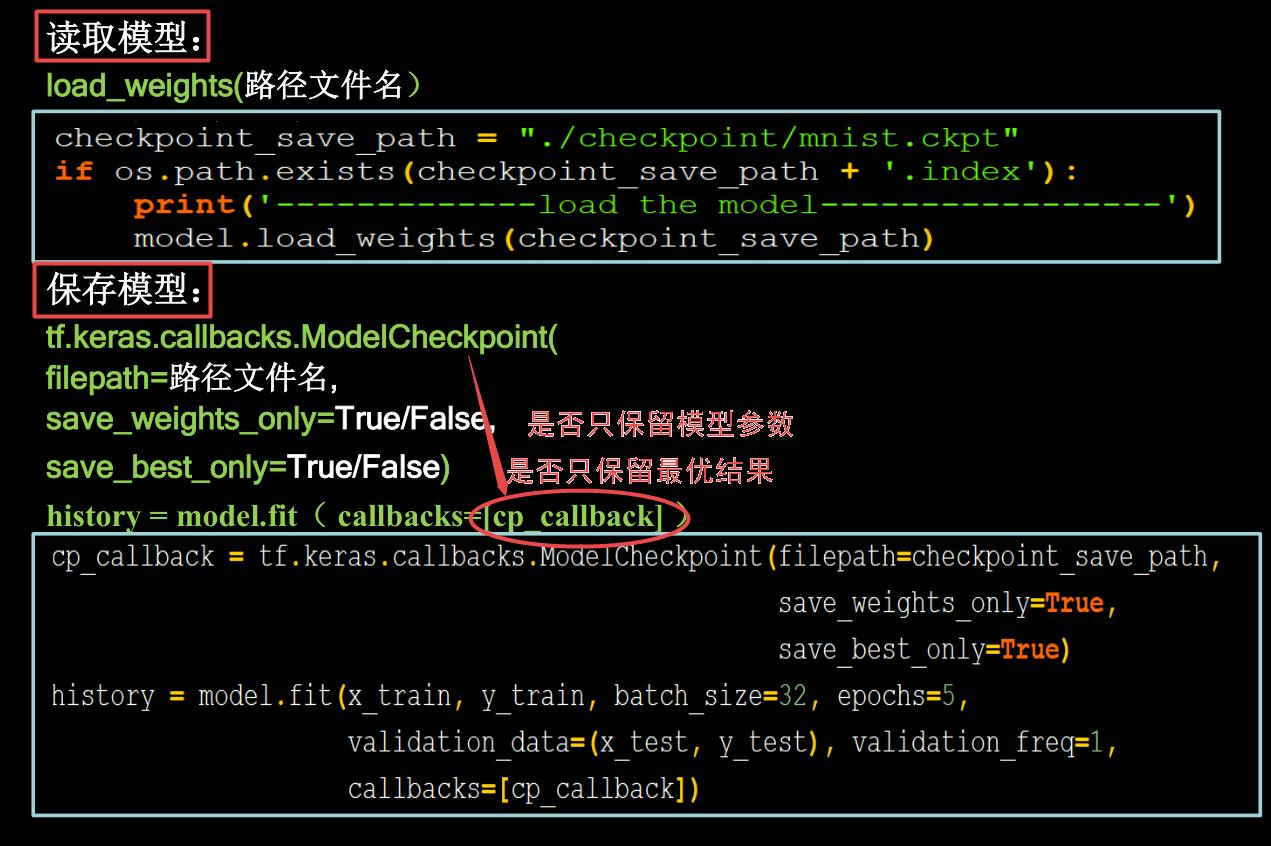

In [35]:
# *******************     用"Sequential六步法"实现手写数字识别     *******************
# =============================        1.import          =============================
import os
# =============================     2.测试集、训练集     =============================
(x_train, y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data() # 导入数据
x_train, x_test = x_train/255.0, x_test/255.0  # 0-255灰度值→归"1"化 | 数值小，更适合神经网络吸收
# =============================  3.Sequential 描述各层网络  ==========================
model = tf.keras.models.Sequential(
    [   
        tf.keras.layers.Flatten(),                     # ①.拉直层  28 * 28 → 784
        tf.keras.layers.Dense(128, activation='relu'), # ②.全链接层
        tf.keras.layers.Dense(10,activation='softmax') # ③.全链接层"0-9共10个神经元"
    ]
)
# =============================    4.Compile 配置训练方法   ==========================
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['sparse_categorical_accuracy'] # 标签是0-9数值，输出是[0.706,0.294,0.023]分布
)
# =============================      5.断点续训     ==========================

checkpoint_save_path = '../class4/MNIST_FC/mnist_image_label/checkpoint/mnist.ckpt'
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------------------读取已存模型----------------------------')
    model.load_weights(checkpoint_save_path)
    
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_save_path,
    save_weights_only = True,
    save_best_only = True)

history = model.fit(x_train,y_train,batch_size=32,epochs=5,
                    validation_data=(x_test, y_test),validation_freq=1,
                    callbacks = [ckpt_callback])

# ==========================  6.summary 打印网络结构和参数统计  ======================
model.summary()

-------------------------读取已存模型----------------------------
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0066 - sparse_categorical_accuracy: 0.9981 - val_loss: 0.1048 - val_sparse_categorical_accuracy: 0.9780
Epoch 2/5
60000/60000 [==============================] - 2s 42us/sample - loss: 0.0057 - sparse_categorical_accuracy: 0.9982 - val_loss: 0.1184 - val_sparse_categorical_accuracy: 0.9781
Epoch 3/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0050 - sparse_categorical_accuracy: 0.9984 - val_loss: 0.1026 - val_sparse_categorical_accuracy: 0.9796
Epoch 4/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0066 - sparse_categorical_accuracy: 0.9981 - val_loss: 0.1031 - val_sparse_categorical_accuracy: 0.9788
Epoch 5/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0034 - sparse_categorical_accuracy: 0.9990 - val_loss: 0.1184 - 

# ④ 参数提取，把参数存入文本 
1.打印所有可训练参数：print(**model.trainable_variables**)  

2.超过多少省略打印：np.set_printoptions(threshold=np.inf) ← np.inf表示无限大  
3.将参数写入txt文本：   
file = open('./weights.txt', 'w')  
for v in model.trainable_variables:  
$~~$file.write(str(v.name) + '\n')  
$~~$file.write(str(v.shape) + '\n')  
$~~$file.write(str(v.numpy()) + '\n')  
file.close()  

In [ ]:
# =============================  7.参数提取，把参数存入文本  =========================
np.set_printoptions(threshold=np.inf) # 超过多少省略打印
print(model.trainable_variables) # 打印所有可训练参数
file = open('../class4/MNIST_FC/mnist_image_label/checkpoint/weights.txt', 'w')
for v in model.trainable_variables: # 将参数写入txt文本
   file.write(str(v.name) + '\n')
   file.write(str(v.shape) + '\n')
   file.write(str(v.numpy()) + '\n')
file.close()

# ⑤ acc/loss 可视化，查看训练效果

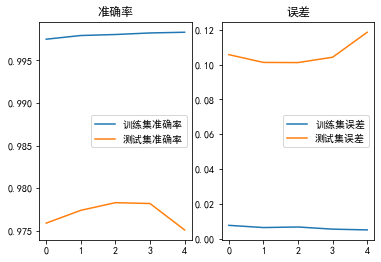

In [27]:
# =============================  8.显示训练集和验证集的acc和loss曲线  =========================
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='训练集准确率')
plt.plot(val_acc, label='测试集准确率')
plt.title('准确率')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='训练集误差')
plt.plot(val_loss, label='测试集误差')
plt.title('误差')
plt.legend()
plt.show()

# ⑥ 应用程序，给图识物
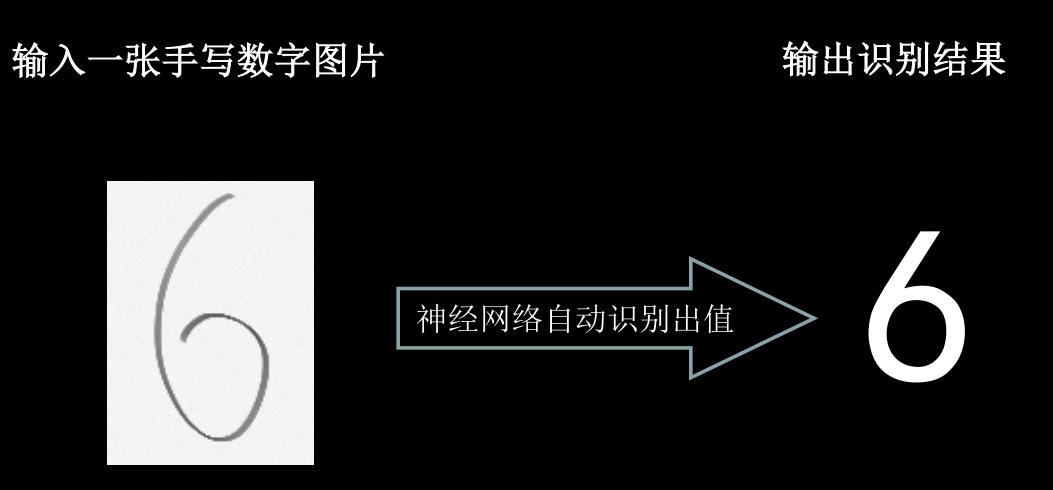

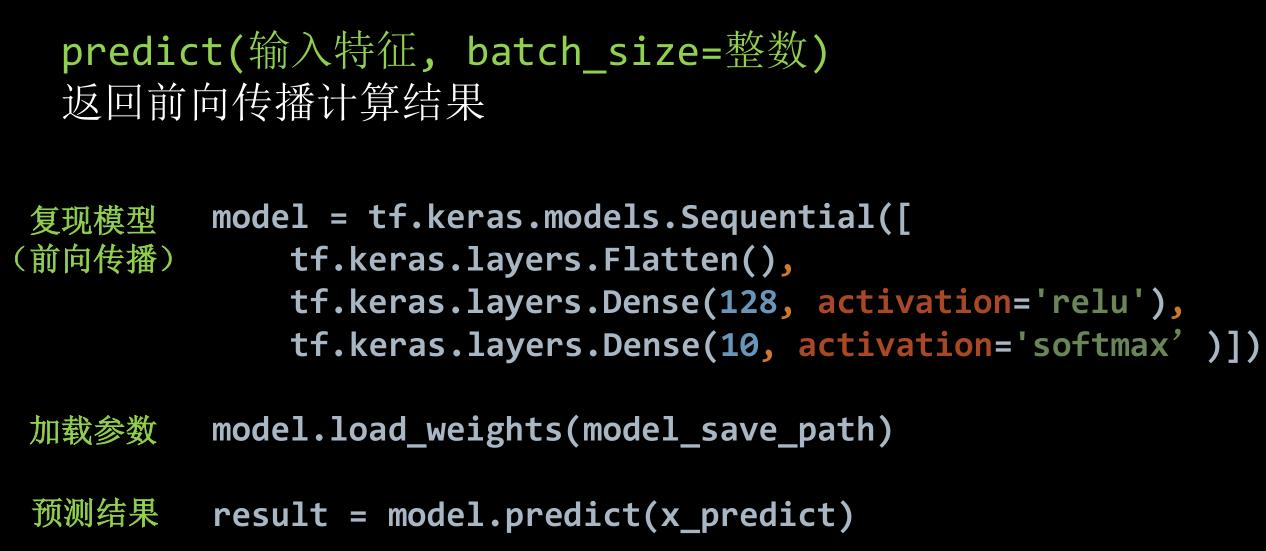

In [38]:
from PIL import Image
# 引入模型
model = tf.keras.models.Sequential(
    [tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dense(10,activation='softmax')]
)
# 加载保存的模型
model.load_weights('../class4/MNIST_FC/mnist_image_label/checkpoint/mnist.ckpt')

for k in range(0,10):
    aim_path = '../class4/MNIST_FC/' + str(k) + '.png' # 遍历 0.png....9.png
    img = Image.open(aim_path) # 打开x.png图片
    img = img.resize((28, 28), Image.ANTIALIAS) # 改变图片大小
    img_arr = np.array(img.convert('L')) # 转化为灰度图
    # 变成非黑即白的图片（去噪声）
    for i in range(28):
        for j in range(28):
            if img_arr[i][j] <200:
                img_arr[i][j] = 255 # 这里是255.0因为预测图片是白底黑字，而数据集图片是黑底白字
            else:
                img_arr[i][j] =0 # 这里是0.0因为预测图片是白底黑字，而数据集图片是黑底白字
    
    img_arr = img_arr / 255.0 # 变为【0，1】矩阵
    print('原来的维度：', img_arr.shape)
    
    # 因为训练的时候是以32个为一组喂入的，多了一个维度。这里我们也要添加一个维度
    x_predict = img_arr[tf.newaxis, ...] # 添加一个维度
    print('现在的维度：', x_predict.shape)
    
    result = model.predict(x_predict) # TensorFlow自带的(前向传播)预测函数
    pred = tf.argmax(result, axis=1) # 取预测结果最大值的下标
    
    print('===================================>{}.png的预测结果为：{}'.format(k, pred))
    

原来的维度： (28, 28)
现在的维度： (1, 28, 28)
===================================>0.png的预测结果为：[0]
原来的维度： (28, 28)
现在的维度： (1, 28, 28)
===================================>1.png的预测结果为：[1]
原来的维度： (28, 28)
现在的维度： (1, 28, 28)
===================================>2.png的预测结果为：[2]
原来的维度： (28, 28)
现在的维度： (1, 28, 28)
===================================>3.png的预测结果为：[3]
原来的维度： (28, 28)
现在的维度： (1, 28, 28)
===================================>4.png的预测结果为：[4]
原来的维度： (28, 28)
现在的维度： (1, 28, 28)
===================================>5.png的预测结果为：[5]
原来的维度： (28, 28)
现在的维度： (1, 28, 28)
===================================>6.png的预测结果为：[6]
原来的维度： (28, 28)
现在的维度： (1, 28, 28)
===================================>7.png的预测结果为：[7]
原来的维度： (28, 28)
现在的维度： (1, 28, 28)
===================================>8.png的预测结果为：[8]
原来的维度： (28, 28)
现在的维度： (1, 28, 28)
===================================>9.png的预测结果为：[9]
